<a href="https://colab.research.google.com/github/Amir-D-Shadow/Google-Colab/blob/main/tensorflow_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
initializer = tf.random_normal_initializer()
x = tf.constant(value=initializer(shape=(2,30,30,64),dtype="float64"))
bn = tf.keras.layers.BatchNormalization(axis=3,trainable=True)
res = bn(x)

In [ ]:
print(bn.moving_mean)
print(bn.moving_variance)

<tf.Variable 'batch_normalization/moving_mean:0' shape=(64,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>
<tf.Variable 'batch_normalization/moving_variance:0' shape=(64,) dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)>


In [ ]:
#activation Mish
def Mish(x):

   softplus = tf.math.softplus(x)
   tanh_s = tf.math.tanh(softplus)

   return (x * tanh_s)

In [ ]:
x = tf.keras.layers.Lambda(Mish)(x)
k = tf.Variable(initial_value=initializer(shape=(2,30,30,64),dtype="float32"))
print(tuple(k.get_shape().as_list()))

(2, 30, 30, 64)


In [ ]:
#Input Layer
k = tf.Variable(initial_value=initializer(shape=(10,30,30,64),dtype="float64"))

in_x = tf.keras.layers.Input(shape=tuple(k.get_shape().as_list()[1:]))
#Convolution 2D layer
conv2D_x = tf.keras.layers.Conv2D(filters=64,kernel_size=3,strides=2)(in_x)

#Batch Normalization layer
BN_x = tf.keras.layers.BatchNormalization(axis=3,trainable=True)(conv2D_x)

#activate by Mish
output_Mish = tf.keras.layers.Lambda(Mish)(BN_x)

model = tf.keras.Model(inputs=in_x,outputs=output_Mish)


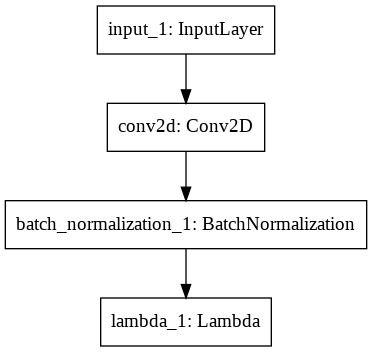

In [ ]:
plot_model(model)


In [ ]:
print(type(conv2D_x))
print(type(output_Mish))
print(type(in_x))

<class 'tensorflow.python.keras.engine.keras_tensor.KerasTensor'>
<class 'tensorflow.python.keras.engine.keras_tensor.KerasTensor'>
<class 'tensorflow.python.keras.engine.keras_tensor.KerasTensor'>


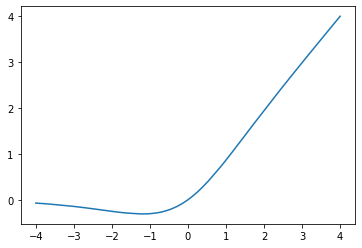

In [ ]:
x = tf.constant(value=np.arange(-4,4,0.000001,dtype="float64"))
res = tf.keras.layers.Lambda(Mish)(x)
#get back the tensor value of the layer , return numpy.ndarray
k = tf.keras.backend.eval(res)
plt.plot(x.numpy(),k)

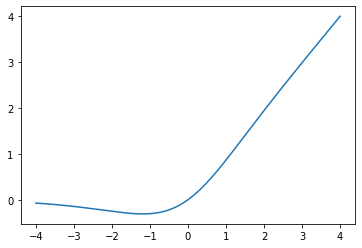

In [ ]:
x = tf.constant(value=np.arange(-4,4,0.000001,dtype="float64"))
res = Mish(x)

plt.plot(x.numpy(),res.numpy())

In [ ]:
res.numpy()

array([-0.07259174, -0.07259179, -0.07259185, ...,  3.99740979,
        3.9974108 ,  3.9974118 ])

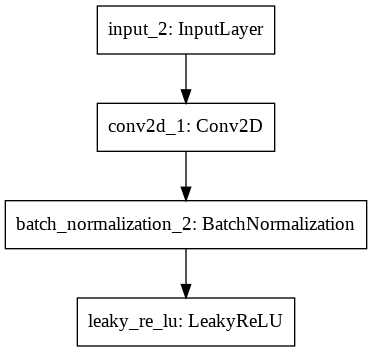

In [ ]:
k = tf.Variable(initial_value=initializer(shape=(10,30,30,64),dtype="float64"))

in_x = tf.keras.layers.Input(shape=tuple(k.get_shape().as_list()[1:]))

conv2D_x = tf.keras.layers.Conv2D(filters=64,kernel_size=3,strides=2)(in_x)

BN_x = tf.keras.layers.BatchNormalization(axis=3)(conv2D_x)

output_leaky_relu = tf.keras.layers.LeakyReLU()(BN_x)

model = tf.keras.Model(inputs=in_x,outputs=output_leaky_relu)

plot_model(model)

In [ ]:
#CBM Module
class CBM(tf.keras.Model):

   def __init__(self,filters=32,kernel_size=3,strides=2,padding="valid",**kwargs):

      #initialization
      super(CBM,self).__init__(**kwargs)

      #define layers
      self.conv2D_x = tf.keras.layers.Conv2D(filters=filters,kernel_size=kernel_size,strides=strides,padding=padding)

      self.BN_x = tf.keras.layers.BatchNormalization(axis=3)

      self.output_Mish = tf.keras.layers.Lambda(Mish)

      

   def call(self,inputs):

      """
      input -- tensorflow layer with shape (m,n_H,n_W,n_C)
      """

      #Convolution 2D layer
      conv2D_x = self.conv2D_x(inputs)

      #Batch Normalization layer
      BN_x = self.BN_x(conv2D_x)

      #activate by Mish
      output_Mish = self.output_Mish(BN_x)

      return output_Mish

In [ ]:
k = tf.Variable(initial_value=initializer(shape=(10,304,304,64),dtype="float64"))

in_x = tf.keras.layers.Input(shape=tuple(k.get_shape().as_list()[1:]))

CBM_1 = CBM(32,1,1,"same")(in_x)

#2nd CBM block
CBM_2 = CBM(64,3,1,"same")(CBM_1)

#Add Layer
output_shortcut = tf.keras.layers.Add()([CBM_2,in_x])

model = tf.keras.Model(inputs=in_x,outputs=output_shortcut)

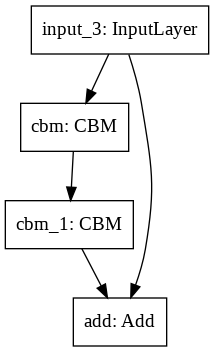

In [ ]:
plot_model(model)

In [ ]:
k = tf.Variable(initial_value=initializer(shape=(10,304,304,64),dtype="float64"))

in_x = tf.keras.layers.Input(shape=tuple(k.get_shape().as_list()[1:]))

#5x5
maxpool_5x5 = tf.keras.layers.MaxPooling2D(pool_size=5,strides=1,padding="same")(in_x)

#9x9
maxpool_9x9 = tf.keras.layers.MaxPooling2D(pool_size=9,strides=1,padding="same")(in_x)

#13x13
maxpool_13x13 = tf.keras.layers.MaxPooling2D(pool_size=13,strides=1,padding="same")(in_x)

#concatenate
output_concat = tf.keras.layers.concatenate(inputs=[maxpool_5x5,maxpool_9x9,maxpool_13x13,in_x],axis=3)

model = tf.keras.Model(inputs=in_x,outputs=output_concat)

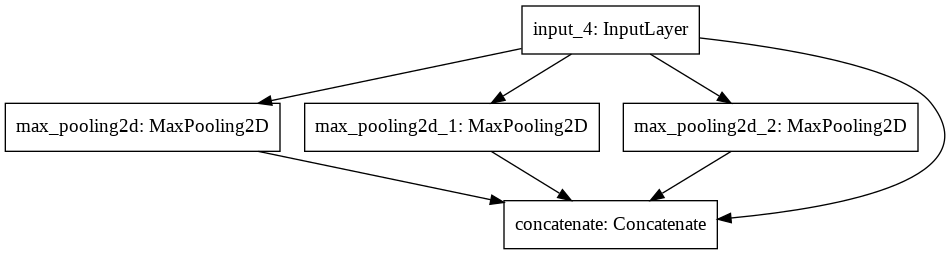

In [ ]:
plot_model(model)

In [ ]:
output_concat.get_shape()

TensorShape([None, 304, 304, 256])

In [ ]:
k = tf.Variable(initial_value=initializer(shape=(10,30,30,64),dtype="float64"))

in_x = tf.keras.layers.Input(shape=tuple(k.get_shape().as_list()[1:]))

res = tf.keras.layers.Conv2DTranspose(filters=512,kernel_size=8,strides=1,padding="same")(in_x)

In [ ]:
print(res.get_shape())

(None, 30, 30, 512)


In [ ]:
#activation Mish
def Mish(x):

   softplus = tf.math.softplus(x)
   tanh_s = tf.math.tanh(softplus)

   return (x * tanh_s)


#TCBM Module
class TCBM(tf.keras.Model):

   def __init__(self,filters=32,kernel_size=3,strides=2,padding="valid",**kwargs):

      #initialization
      super(TCBM,self).__init__(**kwargs)

      #define layers
      self.conv2D_transpose_x = tf.keras.layers.Conv2DTranspose(filters=filters,kernel_size=kernel_size,strides=strides,padding=padding)

      self.BN_x = tf.keras.layers.BatchNormalization(axis=3)

      self.output_Mish = tf.keras.layers.Lambda(Mish)

      

   def call(self,inputs):

      """
      input -- tensorflow layer with shape (m,n_H,n_W,n_C)
      """

      #Convolution 2D layer
      conv2D_transpose_x = self.conv2D_transpose_x(inputs)

      #Batch Normalization layer
      BN_x = self.BN_x(conv2D_transpose_x)

      #activate by Mish
      output_Mish = self.output_Mish(BN_x)

      return output_Mish

   def graph_model(self,dim):

      x = tf.keras.layers.Input(shape=dim)
      
      return tf.keras.Model(inputs=x,outputs=self.call(x))

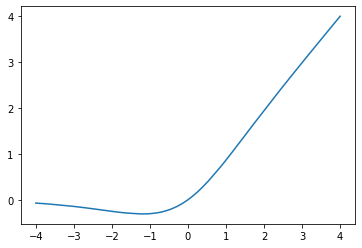

In [9]:
x = tf.constant(value=np.arange(-4,4,0.000001,dtype="float64"))
res = tf.keras.layers.Lambda(Mish)(x)
#get back the tensor value of the layer , return numpy.ndarray
k = tf.keras.backend.eval(res)
plt.plot(x.numpy(),k)

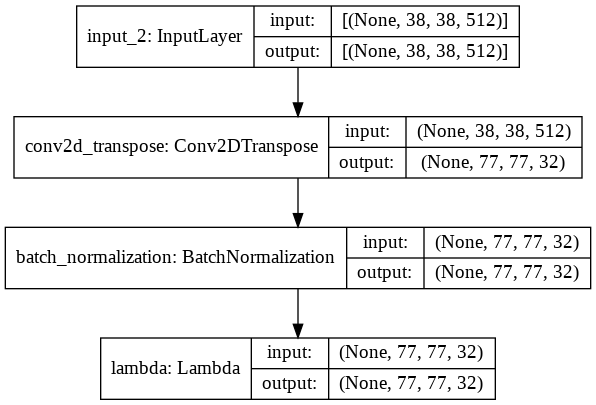

In [8]:
#TCBM
initializer = tf.random_normal_initializer()
k = tf.Variable(initial_value=initializer(shape=(10,38,38,512),dtype="float32"))
in_x = tf.keras.layers.Input(shape=tuple(k.get_shape().as_list()[1:]))

y = TCBM()
model = y.graph_model(tuple(in_x.get_shape().as_list()[1:]))
plot_model(model,show_shapes=True, show_layer_names=True)